# Analisis de bienestar en Mexico


Ahora vamos a leer el archivo como un `DataFrame` de `Pandas`. Para quienes nunca han usado `Pandas` este es un modulo de *python* que se basa en *numpy* y que trata de replicar las facilidades de tratamiento de datos como tablas que ofrece el lenguaje de programación *R*. Si no tienes experiencia previa en *Pandas* se anexa en los documentos de la tarea una libreta de introducción al uso de *Pandas* que espero sea de utilidad.   

In [4]:
import numpy as np
import pandas as pd

# url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'

bienestar_df = pd.read_csv("indicadores_bienestar_2014.csv", index_col = 0, thousands  = ',')
bienestar_df.index.names = ['Entidad']
bienestar_df.columns.names = ['Indicadores']

bienestar_df = bienestar_df[1:] # Ignorar 'Estados unidos mexicanos
columnas = ['Acceso a servicios de salud',
           'Participación cívica y política',
           'Participación electoral',
           'Esperanza de vida al nacer',
           'Salud autorreportada',
           'Tasa de obesidad',
           'Niveles de educación',
           'Deserción escolar']
bienestar_df = bienestar_df[columnas]

Se especificó que `index_col` es 0 ya que los nombres de los países son las etiquetas de cada objeto. Dado que los datos numéricos vienen formateados, se le aviso al lector que los números tienen una coma para separar los miles. Por último se le dió un nombre a la columna de índices y otro nombre al renglon de etiquetas de los atributos. Veamos los 10 primeros datos:  

In [5]:
bienestar_df.head()

Indicadores,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
Entidad,,,,,,,,
Aguascalientes,87.9,8.4,37.2,75.9,8.0,31.0,42.5,12.1
Baja California,80.6,4.1,30.9,74.2,8.5,39.5,44.8,19.3
Baja California Sur,84.9,3.0,52.6,76.2,8.4,43.6,48.4,11.7
Campeche,89.3,11.2,61.2,75.4,7.9,43.3,40.6,15.0
Coahuila de Zaragoza,87.2,6.5,45.0,76.0,8.2,37.1,42.9,19.1


Y vamos a ver un resumen de la informaci´n que tenemos en el `DataFrame`:

In [7]:
bienestar_df.describe()

Indicadores,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,85.387500,7.096875,48.153125,75.221875,8.153125,34.065625,39.875000,13.100000
std,2.951517,3.002524,9.238000,0.958404,0.215503,5.247218,6.587917,4.188001
min,77.200000,1.700000,30.900000,73.000000,7.700000,25.400000,27.700000,2.800000
25%,84.400000,4.100000,41.675000,74.900000,8.075000,30.300000,35.425000,11.100000
50%,85.750000,7.450000,45.950000,75.500000,8.100000,33.300000,40.700000,13.000000
75%,87.275000,9.325000,55.575000,75.900000,8.250000,37.100000,43.100000,15.975000
max,90.900000,13.000000,70.900000,76.700000,8.500000,44.800000,58.800000,19.300000


## Reducción de la dimensionalidad con PCA

Como en este caso lo que nos interesa es poder hacer una exploración de los datos, vamos a usar el análisis en componentes principales como una herramienta para obtener la mejor foto posible de los datos que nos interesan. Por esta razón, solo vamos a utilizar las dos primeras componentes principales.

Para hacer los componentes principales, no los vamos a programar, si no que vamos a utilizar una biblioteca superpoderosa para aprendizaje máquina `Sklearn`. Si bien estas bibliotecas nos facilitan la vida, hay que tener cuidado de entender la documentación y saber que hace cada algoritmo, si no estaríamos como *el burro que toco la flauta*.

Por ejemplo, para hacer el análisis en componentes principales, simplemente tenemos que hacer:

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(bienestar_df)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Y con el objeto `pca`previamente entrenado, podemos transformar nuestros datos en dos dimensiones como

In [16]:
bienestar_pca = pca.transform(bienestar_df)

Tambien hubieramos podido llamar simplemente `fit_transform` para hacer ambos pasos en uno solo. Ahora vamos a transformar el `ndarray` que obtuvimos en un `DataFrame` de *Pandas* para mantener el formato.

In [17]:
bienestar_pca_df = pd.DataFrame(bienestar_pca)
bienestar_pca_df.index = bienestar_df.index
bienestar_pca_df.columns = ['CP_1', 'CP_2', 'CP_3', 'CP_4', 'CP_5', 'CP_6']
bienestar_pca_df.head()

,CP_1,CP_2,CP_3,CP_4,CP_5,CP_6
Entidad,,,,,,
Aguascalientes,-10.769060,1.981082,-2.079756,-0.778221,-4.518294,-0.022359
Baja California,-16.417348,8.691286,7.039314,-2.306827,4.072352,-2.453133
Baja California Sur,5.952582,11.826557,2.713519,2.558316,2.558993,2.746557
Campeche,14.999773,2.530764,6.944728,0.505571,-3.449457,0.149151
Coahuila de Zaragoza,-2.427343,4.146139,4.579533,-4.841711,-0.533199,0.556076


La varianza de los datos que explican los dos primeros componentes principales es:

In [18]:
print(pca.explained_variance_ratio_) 

[0.45919814 0.26245041 0.10804095 0.08926823 0.04960319 0.02908142]


#### Pregunta para contestar: ¿Cuanta varianza explica la primer componente principal? ¿Y la segunda? ¿Es una mucho mayor que la otra? ¿Que puede significar eso? ¿Se explica el 98 % de la varianza con ambas o no?
Las varianzas no pasan el 50%, por lo que es aceptable las diferenciass entre componentes.

Ya estamos listos para imprimir los resultados y vamos a usar las facilidades de graficación que provée *Pandas*. Si quieres saber más, consulta [aquí](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html). Y para que se vea *fancy* vamos a agregar el nombre del país a cada uno de los puntos de la gráfica.    

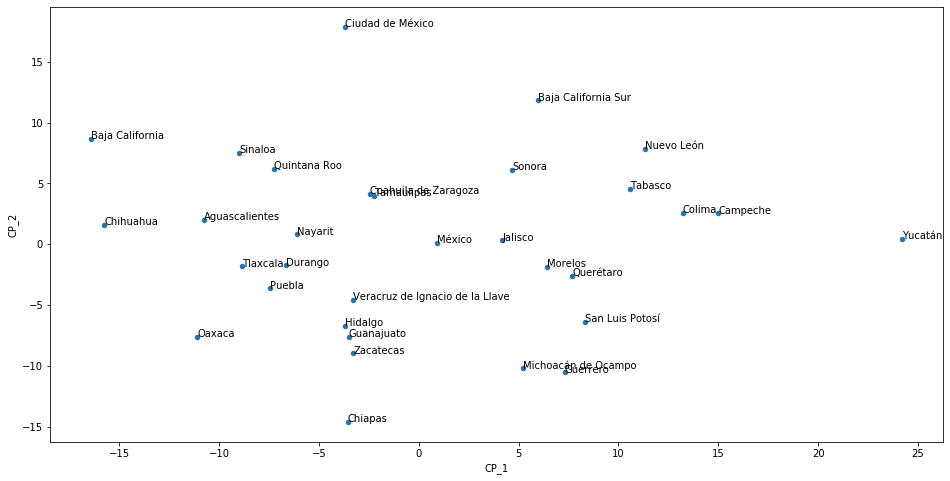

In [21]:
%matplotlib inline

ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, estado in enumerate(bienestar_pca_df.index):
    ax.annotate(estado, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))

En general, cada vez que realicé un muestreo diferente, la primer componente principal explica la mayor parte de la variación, y por lo tanto la distribución de los paises a lo largo del eje `CP_1` explica mejor las diferencias entre estados.  

## Buscando similitudes entre estados usando las K-medias

Con el fin de encontrar un posible regrupamiento de los paises en casos representativos, vamos a utilizar el método de las K-medias. Un problema grande del uso del algoritmo de las K-medias es determinar el número correcto del regrupamientos, problema que en general hay que resolver a pulmón.

Para esto, vaos a utilizar una técnica semi automátixzada llamada *el método del codo*, en la cuálse calcula las k-medias para K=2, 3, .., maxK, y luego se mide el costo de la solución con este número de clusters. Se espera que tiendan a 0 conforme K tiende al número de objetos, pero nos vamos a fijar en donde se encuentran algún punto de quiebre en la gráfica que nos indique que ese número de algomeraciones es correcto. Por supuesto es solo un criterio semiformal y el criterio subjetivo juega un papel importante.

El número máximo de clusters se determina por la aplicación que vamos a realizar. Por ejemplo, en este caso que queremos analisar 30 paises, más de 5 agrupaciones diferentes sería demasiado. 


Text(0.5, 1.0, 'Selección de K con el método del codo')

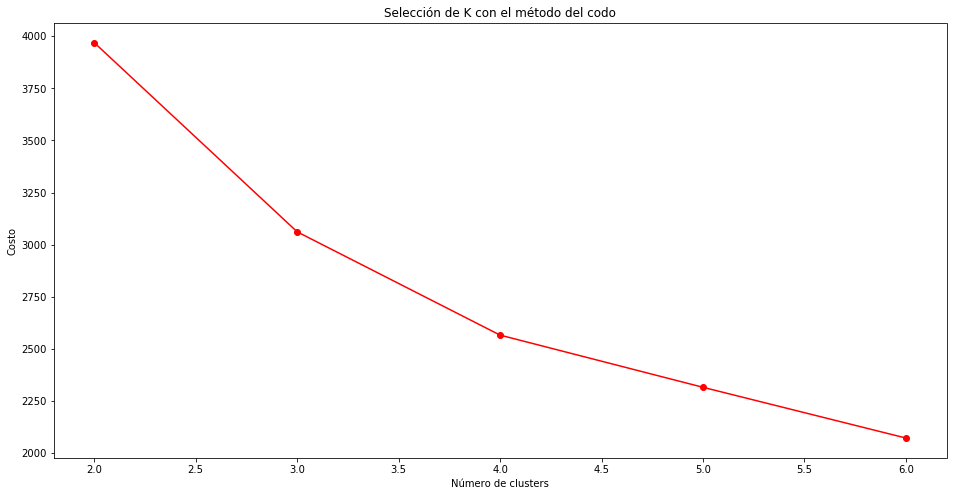

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bienestar_df)
    costos.append(-kmeans.score(bienestar_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')


En el caso particular que yo tome (cada caso al repetirse es diferente) me encuentro con dos codos, uno en 3 y unos en 4, pero el de 4 es mñas pronunciado, así que me quedo con ese.

#### Pregunta para contestar: ¿Cual fué el codo más pronunciado para tu caso particular?
El 4

Ahora agregamos los clusters obtenidos a los datos que ya habíamos reducido con PCA (par poder visualizarlos) y los graficamos de la misma manera.

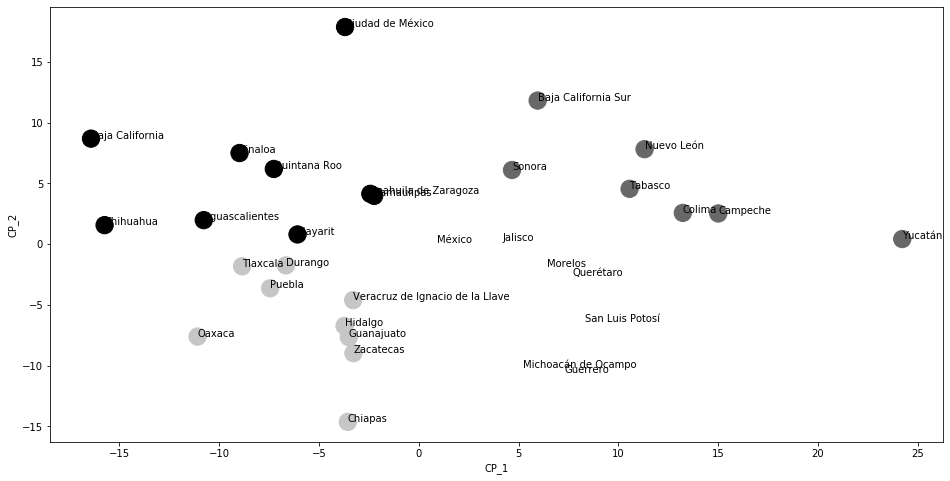

In [23]:
K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(bienestar_df)
bienestar_pca_df['grupos'] = pd.Series(clusters.labels_, index=bienestar_pca_df.index)


ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=bienestar_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, pais in enumerate(bienestar_pca_df.index):
    ax.annotate(pais, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))


Muy bien. Ya tenemos un primer análisis. Sin embargo no tenemos una idea clara de que significan los clusters. Para eso vamos a analizar los prototipos de clases que tenemos, y los cuales están asociados con un conjunto de paises.

In [24]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = bienestar_df.columns
prototipos_df.index.names = ['Porcentaje']
prototipos_df.columns.names = ['Indicador']

prototipos_df

Indicador,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
Porcentaje,,,,,,,,
P1,84.785714,6.842857,54.985714,75.057143,8.085714,29.414286,37.814286,12.514286
P2,85.155556,6.888889,43.133333,74.722222,8.066667,31.422222,33.388889,13.788889
P3,86.642857,8.571429,58.942857,75.771429,8.157143,40.957143,43.828571,13.628571
P4,85.111111,6.355556,39.466667,75.422222,8.288889,34.966667,44.888889,12.455556


Lo que es más fácil de analizar que 30 paises. Inclusive se pueden graficar en el tiempo y tiene sentido.

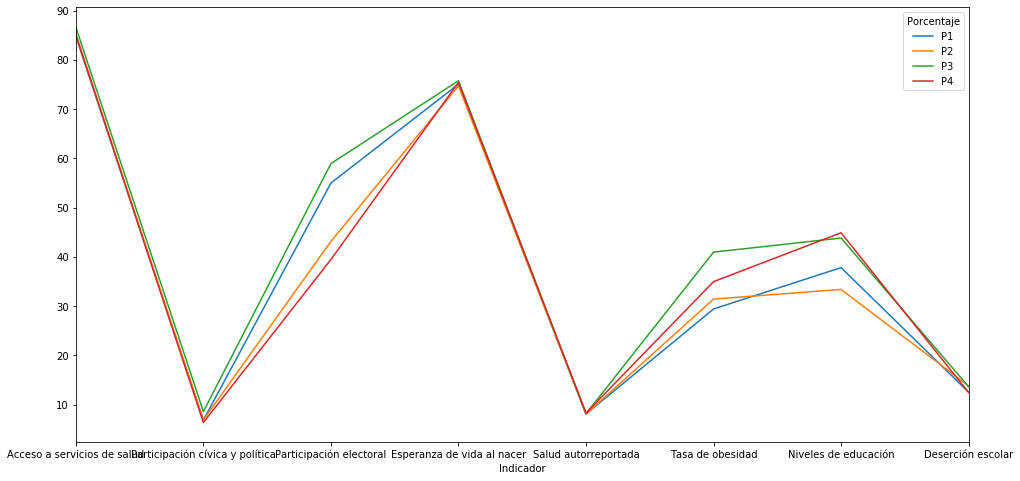

In [25]:
prototipos_df.T.plot(figsize=(16,8))

#### Pregunta para contestar: En función de las gráficas, da una explicación coherente a los diferentes prototipos y que puede significar (i.e. paises con mucha tuberculosis que van mejorando, paises que van empeorando en cuanto a casos de tuberculosis, paises que experimentaron un pico el año XXXX, etc...)
